In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate
from scipy import spatial
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf

# %matplotlib notebook

rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

ShearJefferyProblem: run 10000 loops using 1.425070


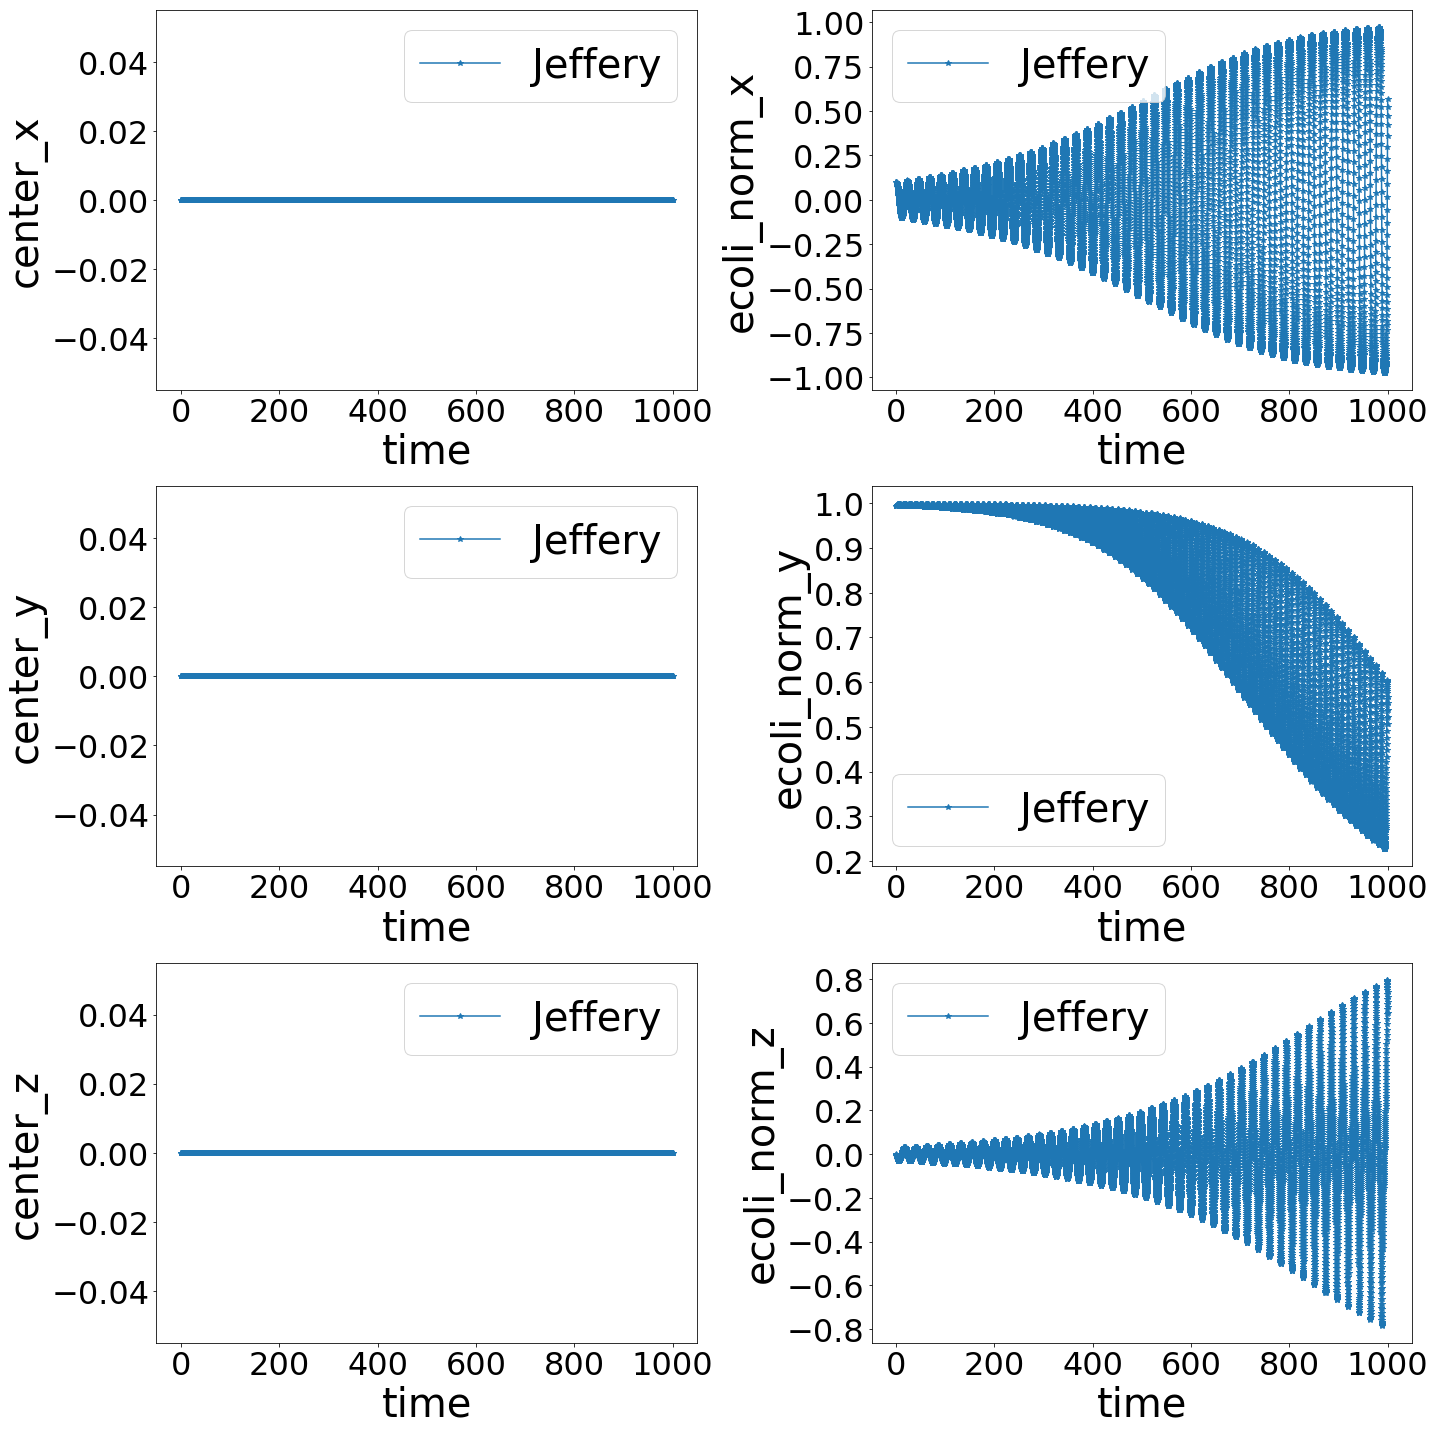

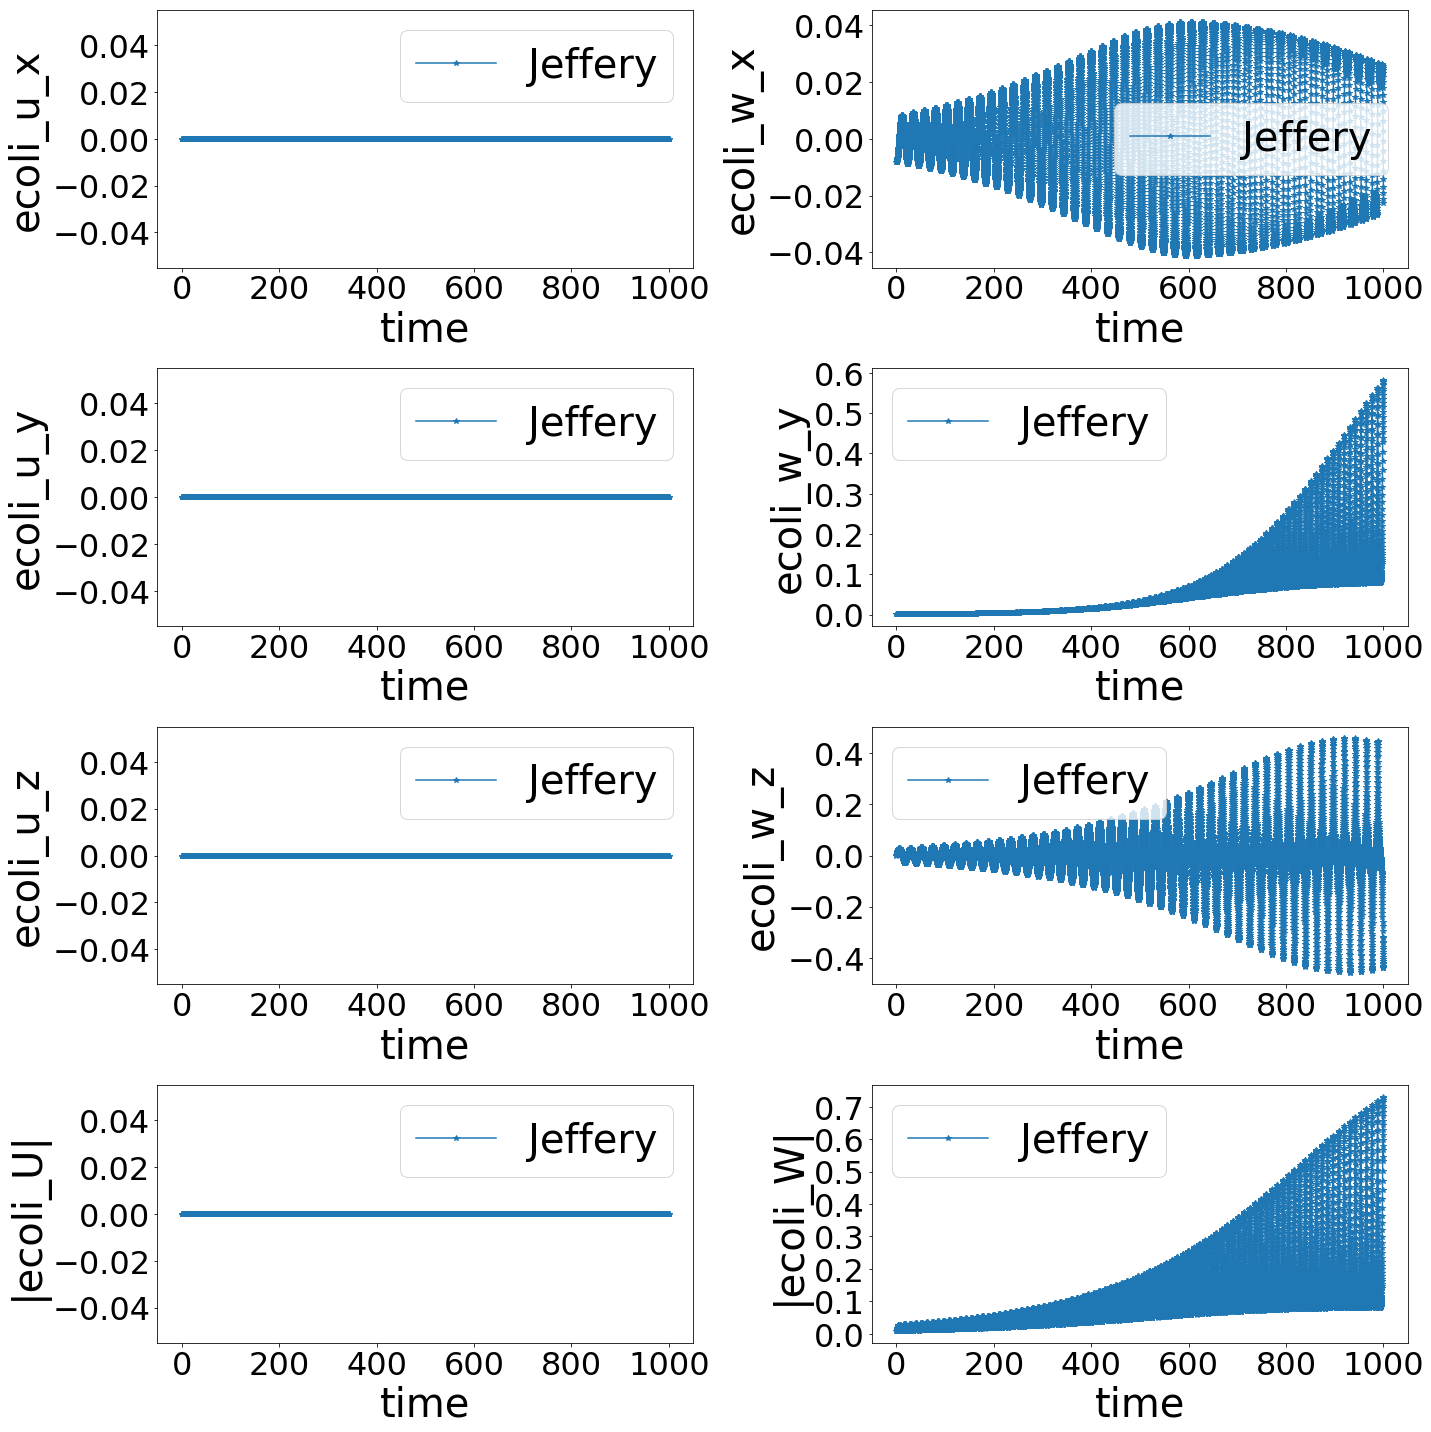

In [6]:
%matplotlib inline

importlib.reload(jm)
fileHandle = 'ShearJefferyProblem'
talpha = 1 / 0.3
tcenter = np.array((0, 0, 0))
ellipse_velocity = 0
# tnorm = np.random.sample(3)
tnorm = np.array((0.1, 1, 0))
tnorm = tnorm / np.linalg.norm(tnorm)
lateral_norm = np.array((1, 0, 0))
lateral_norm = lateral_norm - tnorm / np.linalg.norm(tnorm) * np.dot(tnorm, lateral_norm) / np.linalg.norm(lateral_norm)
lateral_norm = lateral_norm / np.linalg.norm(lateral_norm)
planeShearRate = (1, 0, 0)
eval_dt = 0.1
max_iter = 10000
problem = jm.ShearJefferyProblem(planeShearRate=planeShearRate)

ellipse_kwargs = {'name':     '1111',
                  'center':   tcenter,
                  'norm':     tnorm / np.linalg.norm(tnorm),
                  'lateral_norm':  lateral_norm / np.linalg.norm(lateral_norm),
                  'speed': ellipse_velocity,
                  'rot_speed': 0,
                  'lbd':      (talpha ** 2 - 1) / (talpha ** 2 + 1)}
ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
ellipse_obj.set_update_para(update_order=1)
problem.add_obj(ellipse_obj)

# evaluation loop
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))
jeffery_t = np.arange(max_iter) * eval_dt + eval_dt
center_hist = np.vstack(ellipse_obj.center_hist)
U_hist = np.vstack(ellipse_obj.U_hist)
norm_hist = np.vstack(ellipse_obj.norm_hist)

fig, [(ax0, ax3), (ax1, ax4), (ax2, ax5)] = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
fig.patch.set_facecolor('white')
ax0.plot(jeffery_t, center_hist[:, 0], '-*', label='Jeffery')
ax1.plot(jeffery_t, center_hist[:, 1], '-*', label='Jeffery')
ax2.plot(jeffery_t, center_hist[:, 2], '-*', label='Jeffery')
for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
    plt.sca(axi)
    axi.set_xlabel('time', size=fontsize)
    axi.set_ylabel('center_%s' % axyi, size=fontsize)
    axi.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
plt.tight_layout()
ax3.plot(jeffery_t, norm_hist[:, 0], '-*', label='Jeffery')
ax4.plot(jeffery_t, norm_hist[:, 1], '-*', label='Jeffery')
ax5.plot(jeffery_t, norm_hist[:, 2], '-*', label='Jeffery')
for axi, axyi in zip((ax3, ax4, ax5, ), ('x', 'y', 'z')):
    plt.sca(axi)
    axi.set_xlabel('time', size=fontsize)
    axi.set_ylabel('ecoli_norm_%s' % axyi, size=fontsize)
    axi.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
plt.tight_layout()

fig, [(ax0, ax3), (ax1, ax4), (ax2, ax5), (ax6, ax7)] = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
fig.patch.set_facecolor('white')
ax0.plot(jeffery_t, U_hist[:, 0], '-*', label='Jeffery')
ax1.plot(jeffery_t, U_hist[:, 1], '-*', label='Jeffery')
ax2.plot(jeffery_t, U_hist[:, 2], '-*', label='Jeffery')
ax3.plot(jeffery_t, U_hist[:, 3], '-*', label='Jeffery')
ax4.plot(jeffery_t, U_hist[:, 4], '-*', label='Jeffery')
ax5.plot(jeffery_t, U_hist[:, 5], '-*', label='Jeffery')
ax6.plot(jeffery_t, np.linalg.norm(U_hist[:, :3], axis=1), '-*', label='Jeffery')
ax7.plot(jeffery_t, np.linalg.norm(U_hist[:, 3:], axis=1), '-*', label='Jeffery')
for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
    plt.sca(axi)
    axi.set_xlabel('time', size=fontsize)
    axi.set_ylabel('ecoli_u_%s' % axyi, size=fontsize)
    axi.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
for axi, axyi in zip((ax3, ax4, ax5, ), ('x', 'y', 'z')):
    plt.sca(axi)
    axi.set_xlabel('time', size=fontsize)
    axi.set_ylabel('ecoli_w_%s' % axyi, size=fontsize)
    axi.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
for axi, axyi in zip((ax6, ax7), ('|ecoli_U|', '|ecoli_W|')):
    plt.sca(axi)
    axi.set_xlabel('time', size=fontsize)
    axi.set_ylabel(axyi, size=fontsize)
    axi.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
plt.tight_layout()



In [5]:
importlib.reload(jm)
eval_dt = 0.1
max_iter = 10
update_order = 3
ellipse_speed = 0
planeShearRate = np.array((1, 0, 0))
talpha = 1 / 0.3
tnorm = np.ones(3)
# tnorm = np.random.sample(3) - np.ones(3) * 0.5
tnorm = tnorm / np.linalg.norm(tnorm)
lateral_norm = np.array((0, 1, 0))
lateral_norm = lateral_norm - tnorm / np.linalg.norm(tnorm) * np.dot(tnorm, lateral_norm) / np.linalg.norm(lateral_norm)
lateral_norm = lateral_norm / np.linalg.norm(lateral_norm)

print(tnorm, lateral_norm, np.dot(tnorm, lateral_norm))

[ 0.57735  0.57735  0.57735] [-0.40825  0.8165  -0.40825] -2.77555756156e-16


ini norm= [ 0.57735  0.57735  0.57735] ellipse_speed= 0
ShearJefferyProblem: run 1000 loops using 0.163873
ShearTableProblem: run 1000 loops using 0.884088


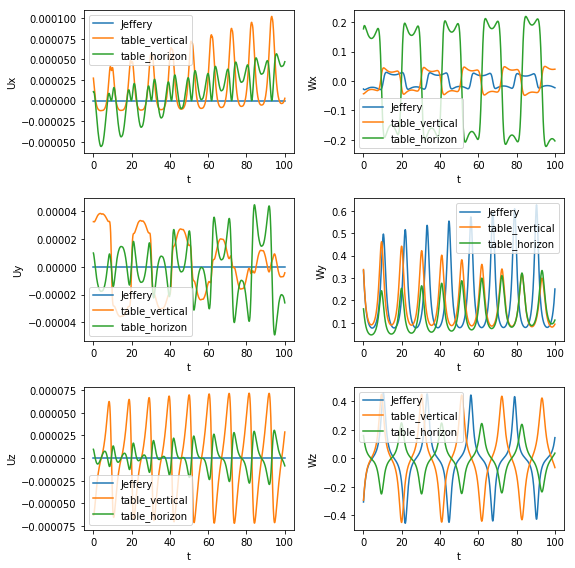

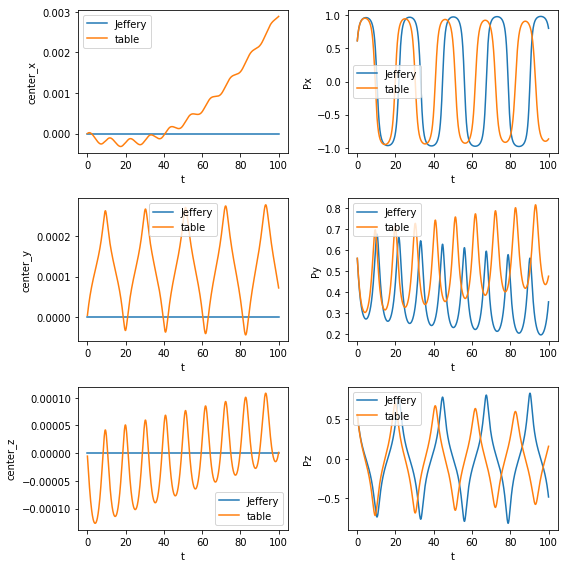

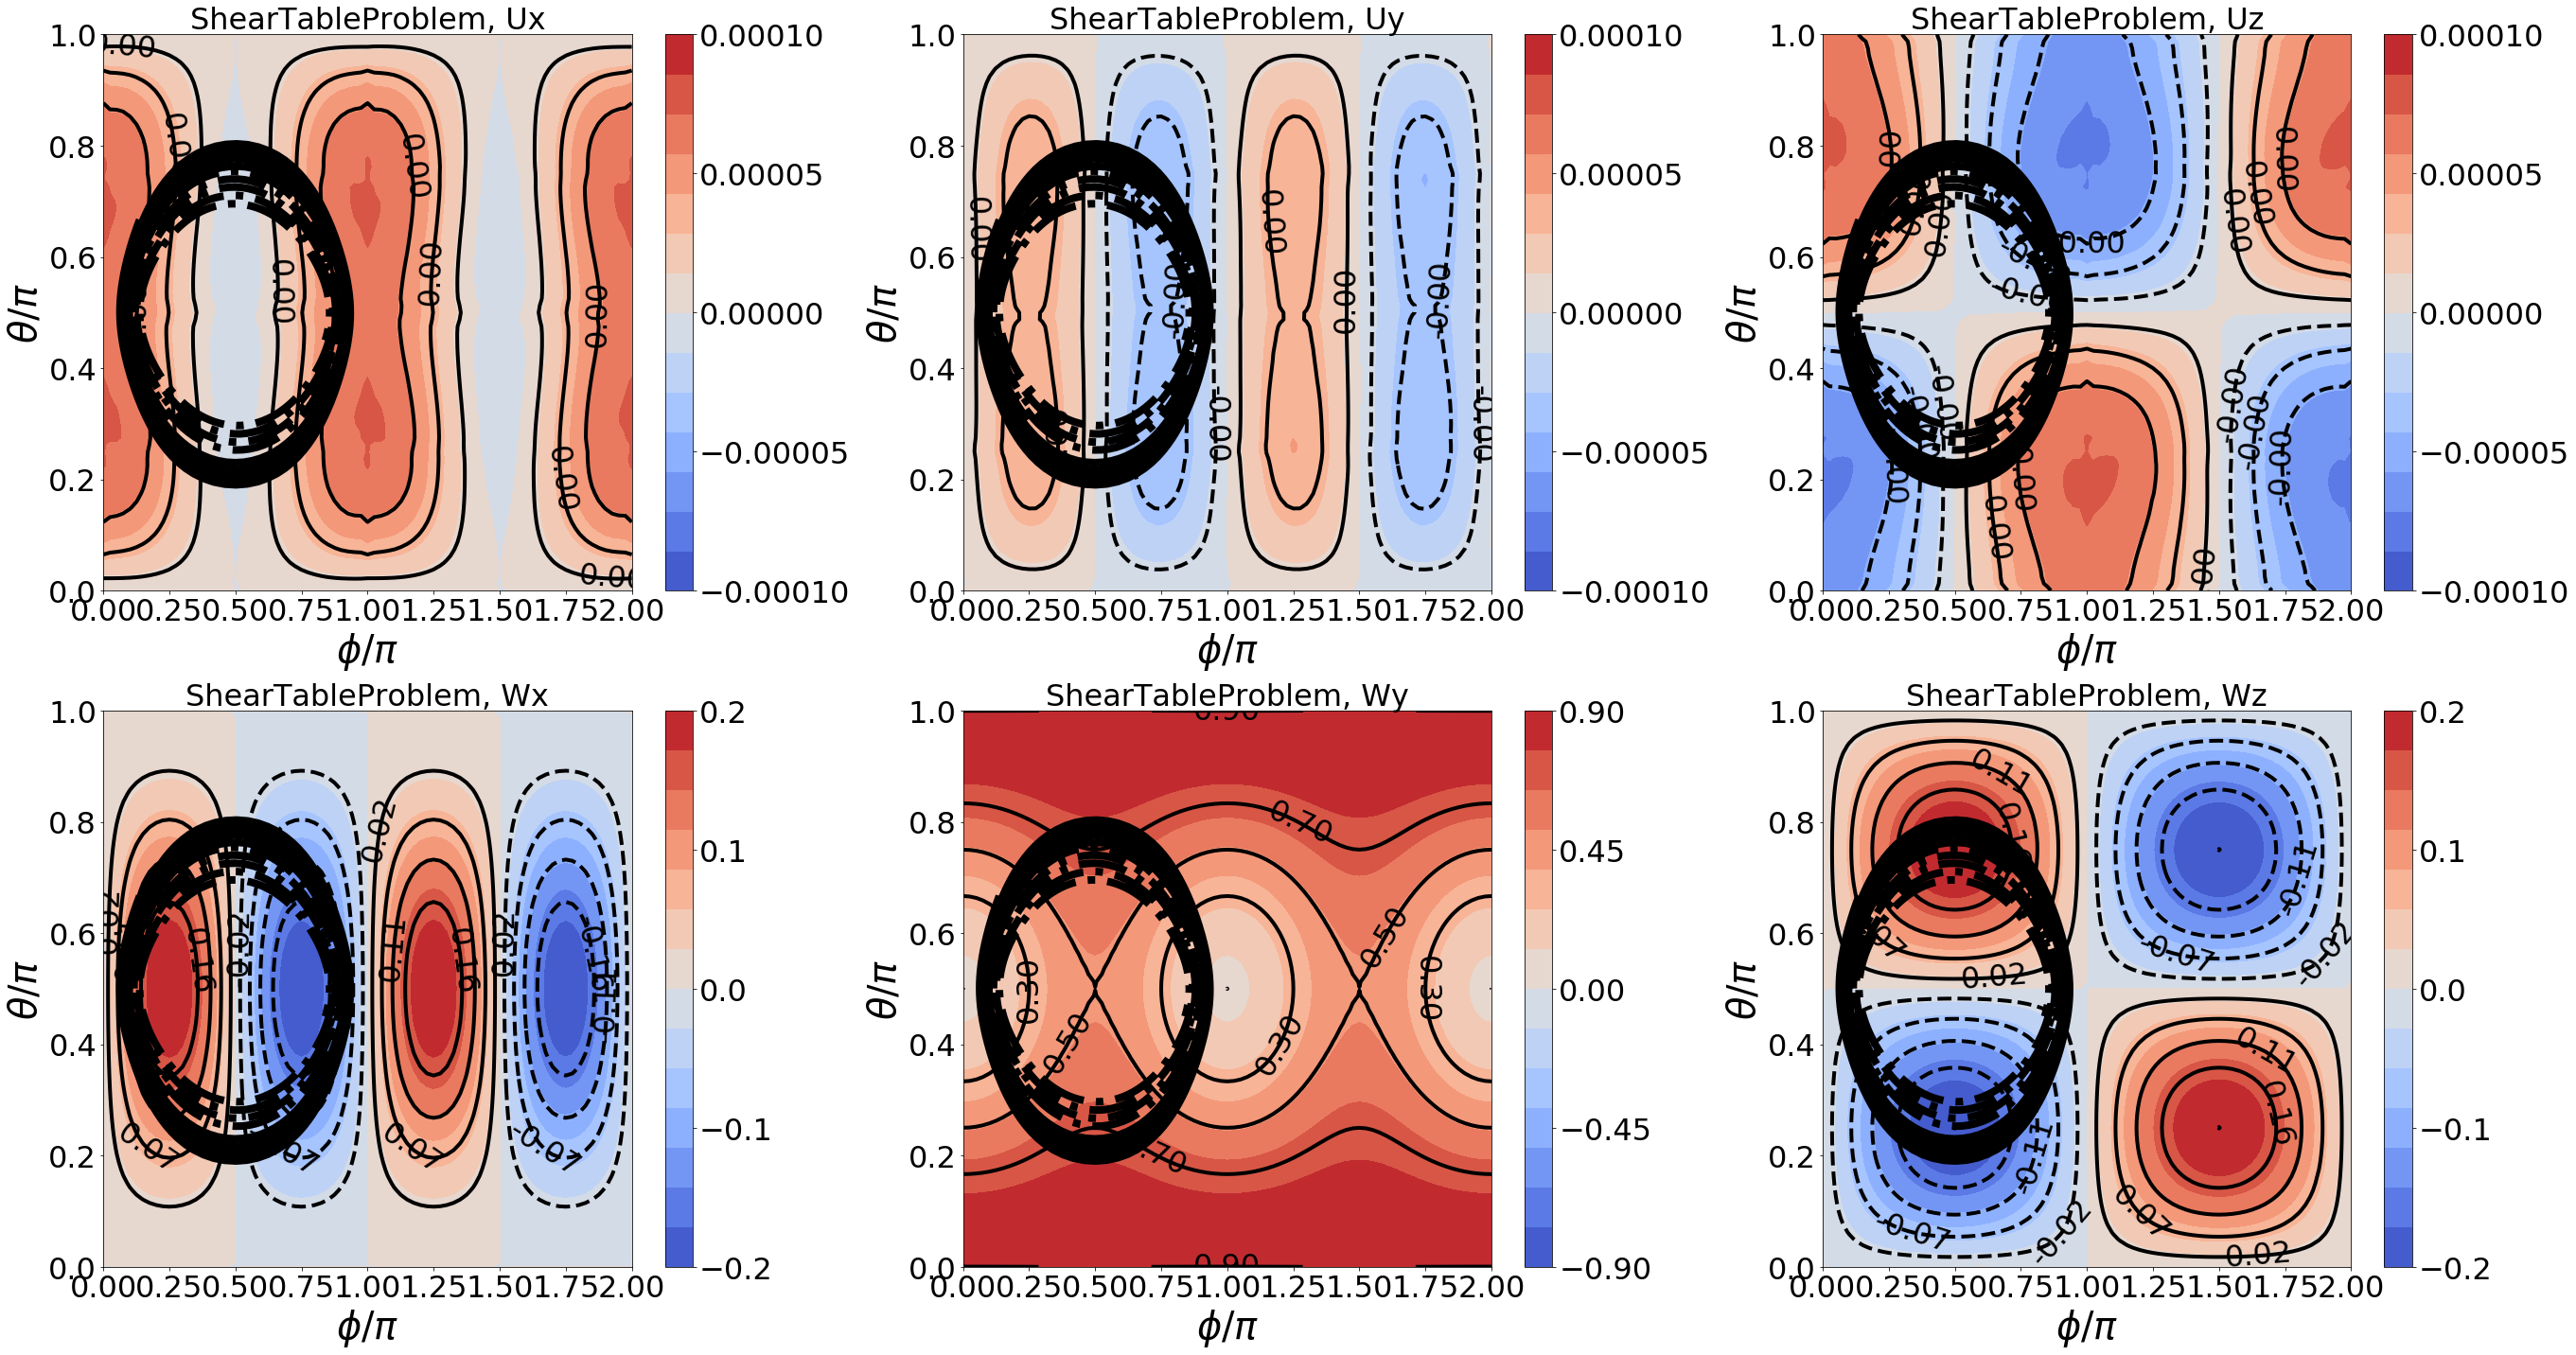

In [39]:
# ellipes case. Jeffery vs Table. 

importlib.reload(jm)
eval_dt = 0.1
max_iter = 1000
update_order = 1
ellipse_speed = 0
planeShearRate = np.array((1, 0, 0))
talpha = 1 / 0.3
tnorm = np.ones(3)
# tnorm = np.random.sample(3) - np.ones(3) * 0.5
tnorm = tnorm / np.linalg.norm(tnorm)
lateral_norm = np.array((0, 1, 0))
lateral_norm = lateral_norm / np.linalg.norm(lateral_norm)
lateral_norm = lateral_norm - tnorm * np.dot(tnorm, lateral_norm)
tcenter = np.array((0, 0, 0))
print('ini norm=', tnorm, 'ellipse_speed=', ellipse_speed)

# Jeffery result
ellipse_kwargs = {'name':         'ellipse',
                  'center':       tcenter,
                  'norm':         tnorm / np.linalg.norm(tnorm),
                  'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                  'speed':        ellipse_speed,
                  'rot_speed':    0,
                  'lbd':          (talpha ** 2 - 1) / (talpha ** 2 + 1)}
fileHandle = 'ShearJefferyProblem'
ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
ellipse_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearJefferyProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(ellipse_obj)
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
Jeffery_X = np.vstack(ellipse_obj.center_hist)
Jeffery_U = np.vstack(ellipse_obj.U_hist)
Jeffery_P = np.vstack(ellipse_obj.norm_hist)
Jeffery_t = np.arange(max_iter) * eval_dt + eval_dt
Jeffery_theta = np.arccos(Jeffery_P[:, 2] / np.linalg.norm(Jeffery_P, axis=1))
t_phi = np.arctan2(Jeffery_P[:, 1], Jeffery_P[:, 0])
Jeffery_phi = np.hstack([t1 + 2 * np.pi if t1 < 0 else t1 for t1 in t_phi])
# Jeffery_phi = Jeffery_P[:, 1] / Jeffery_P[:, 0]
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))

# Table result
ellipse_kwargs = {'name':         'ellipse',
                  'center':       tcenter,
                  'norm':         tnorm / np.linalg.norm(tnorm),
                  'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                  'speed':        ellipse_speed,
                  'lbd':          (talpha ** 2 - 1) / (talpha ** 2 + 1), 
                  'table_name':   'ellipse_alpha3', }
fileHandle = 'ShearTableProblem'
ellipse_obj = jm.TableObj(**ellipse_kwargs)
ellipse_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearTableProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(ellipse_obj)
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
Table_X = np.vstack(ellipse_obj.center_hist)
Table_U = np.vstack(ellipse_obj.U_hist)
Table_P = np.vstack(ellipse_obj.norm_hist)
Table_t = np.arange(max_iter) * eval_dt + eval_dt
# Table_theta = np.arccos(Table_P[:, 2] / np.linalg.norm(Table_P, axis=1))
# t_phi = np.arctan2(Table_P[:, 1], Table_P[:, 0])
# Table_phi = np.hstack([t1 + 2 * np.pi if t1 < 0 else t1 for t1 in t_phi])
Table_theta, Table_phi, Table_psi = ellipse_obj.theta_phi_psi
t1U = np.array([np.dot(t1, t2) for t1, t2 in zip(Table_U[:, :3], Table_P)]).reshape((-1, 1))
t1W = np.array([np.dot(t1, t2) for t1, t2 in zip(Table_U[:, 3:], Table_P)]).reshape((-1, 1))
Table_U_horizon = np.hstack((Table_P * t1U, Table_P * t1W))
Table_U_vertical = Table_U - Table_U_horizon
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 3)
ax2 = fig.add_subplot(3, 2, 5)
ax3 = fig.add_subplot(3, 2, 2)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 6)
ax0.plot(Jeffery_t, Jeffery_U[:, 0], label='Jeffery')
ax1.plot(Jeffery_t, Jeffery_U[:, 1], label='Jeffery')
ax2.plot(Jeffery_t, Jeffery_U[:, 2], label='Jeffery')
ax3.plot(Jeffery_t, Jeffery_U[:, 3], label='Jeffery')
ax4.plot(Jeffery_t, Jeffery_U[:, 4], label='Jeffery')
ax5.plot(Jeffery_t, Jeffery_U[:, 5], label='Jeffery')
# ax0.plot(Table_t, Table_U[:, 0], label='table')
# ax1.plot(Table_t, Table_U[:, 1], label='table')
# ax2.plot(Table_t, Table_U[:, 2], label='table')
# ax3.plot(Table_t, Table_U[:, 3], label='table')
# ax4.plot(Table_t, Table_U[:, 4], label='table')
# ax5.plot(Table_t, Table_U[:, 5], label='table')
ax0.plot(Table_t, Table_U_vertical[:, 0], label='table_vertical')
ax1.plot(Table_t, Table_U_vertical[:, 1], label='table_vertical')
ax2.plot(Table_t, Table_U_vertical[:, 2], label='table_vertical')
ax3.plot(Table_t, Table_U_vertical[:, 3], label='table_vertical')
ax4.plot(Table_t, Table_U_vertical[:, 4], label='table_vertical')
ax5.plot(Table_t, Table_U_vertical[:, 5], label='table_vertical')
ax0.plot(Table_t, Table_U_horizon[:, 0], label='table_horizon')
ax1.plot(Table_t, Table_U_horizon[:, 1], label='table_horizon')
ax2.plot(Table_t, Table_U_horizon[:, 2], label='table_horizon')
ax3.plot(Table_t, Table_U_horizon[:, 3], label='table_horizon')
ax4.plot(Table_t, Table_U_horizon[:, 4], label='table_horizon')
ax5.plot(Table_t, Table_U_horizon[:, 5], label='table_horizon')
for axi, axyi in zip((ax0, ax1, ax2, ax3, ax4, ax5, ), ('Ux', 'Uy', 'Uz','Wx', 'Wy', 'Wz')):
    axi.set_xlabel('t')
    axi.set_ylabel('%s' % axyi)
    axi.legend()
plt.tight_layout()

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 3)
ax2 = fig.add_subplot(3, 2, 5)
ax3 = fig.add_subplot(3, 2, 2)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 6)
Jeffery_t = np.arange(max_iter) * eval_dt + eval_dt
ax0.plot(Jeffery_t, Jeffery_X[:, 0], label='Jeffery')
ax1.plot(Jeffery_t, Jeffery_X[:, 1], label='Jeffery')
ax2.plot(Jeffery_t, Jeffery_X[:, 2], label='Jeffery')
ax0.plot(Table_t, Table_X[:, 0], label='table')
ax1.plot(Table_t, Table_X[:, 1], label='table')
ax2.plot(Table_t, Table_X[:, 2], label='table')
ax3.plot(Jeffery_t, Jeffery_P[:, 0], label='Jeffery')
ax4.plot(Jeffery_t, Jeffery_P[:, 1], label='Jeffery')
ax5.plot(Jeffery_t, Jeffery_P[:, 2], label='Jeffery')
ax3.plot(Table_t, Table_P[:, 0], label='table')
ax4.plot(Table_t, Table_P[:, 1], label='table')
ax5.plot(Table_t, Table_P[:, 2], label='table')
for axi, axyi in zip((ax0, ax1, ax2, ax3, ax4, ax5), ('center_x', 'center_y', 'center_z', 'Px', 'Py', 'Pz')):
    axi.set_xlabel('t')
    axi.set_ylabel('%s' % axyi)
    axi.legend()
plt.tight_layout()

# fig = plt.figure(figsize=(8, 8))
# fig.patch.set_facecolor('white')
# ax0 = fig.add_subplot(3, 2, 1)
# ax1 = fig.add_subplot(3, 2, 3)
# ax2 = fig.add_subplot(3, 2, 5)
# ax3 = fig.add_subplot(3, 2, 2)
# ax4 = fig.add_subplot(3, 2, 4)
# ax5 = fig.add_subplot(3, 2, 6)
# Jeffery_t = np.arange(max_iter) * eval_dt + eval_dt
# ax0.plot(Jeffery_t, Jeffery_P[:, 0], label='Jeffery')
# ax1.plot(Jeffery_t, Jeffery_P[:, 1], label='Jeffery')
# ax2.plot(Jeffery_t, Jeffery_P[:, 2], label='Jeffery')
# ax0.plot(Table_t, Table_P[:, 0], label='table')
# ax1.plot(Table_t, Table_P[:, 1], label='table')
# ax2.plot(Table_t, Table_P[:, 2], label='table')
# ax3.plot(Jeffery_t, Jeffery_theta / np.pi, label='Jeffery')
# ax4.plot(Jeffery_t, Jeffery_phi / np.pi, label='Jeffery')
# ax3.plot(Table_t, Table_theta / np.pi, label='table')
# ax4.plot(Table_t, Table_phi / np.pi, label='table')
# for axi, axyi in zip((ax0, ax1, ax2, ax3, ax4, ), ('Px', 'Py', 'Pz', '$\\theta / \pi$', '$\\phi / \pi$')):
#     axi.set_xlabel('t')
#     axi.set_ylabel('%s' % axyi)
#     axi.legend()
# plt.tight_layout()


# Phase map
ellipse_kwargs = {'name':         'ellipse',
                  'center':       tcenter,
                  'norm':         tnorm / np.linalg.norm(tnorm),
                  'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                  'speed':        ellipse_speed,
                  'lbd':          (talpha ** 2 - 1) / (talpha ** 2 + 1), 
                  'table_name':   'ellipse_alpha3', }
fileHandle = 'ShearTableProblem'
ellipse_obj = jm.TableObj(**ellipse_kwargs)
ellipse_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearTableProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(ellipse_obj)
intp_n_theta, intp_n_phi = 81, 81
txx, tyy = np.meshgrid(np.linspace(0, np.pi, intp_n_theta), np.linspace(0, 2 * np.pi, intp_n_phi))
tU = []
for i0, (tx1, ty1) in enumerate(zip(txx.flatten(), tyy.flatten())):
    tU.append(ellipse_obj.intp_U_fun(tx1, ty1, 0))
tU = np.vstack(tU)

fig = plt.figure(figsize=(38, 20))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(2, 3, 1)
ax1 = fig.add_subplot(2, 3, 2)
ax2 = fig.add_subplot(2, 3, 3)
ax3 = fig.add_subplot(2, 3, 4)
ax4 = fig.add_subplot(2, 3, 5)
ax5 = fig.add_subplot(2, 3, 6)
for axi, ui, zlabeli, (vmin, vmax) in zip((ax0, ax1, ax2, ax3, ax4, ax5), 
                                            tU.T, 
                                            ('Ux', 'Uy', 'Uz', 'Wx', 'Wy', 'Wz'),
                                            ((-1e-4, 1e-4), (-1e-4, 1e-4), (-1e-4, 1e-4), 
                                             (-0.2, 0.2), (-0.9, 0.9), (-0.2, 0.2))):
    plt.sca(axi)
    ticks = np.linspace(vmin, vmax, 15)
    im = axi.contourf(tyy / np.pi, 
                      txx / np.pi, 
                      ui.reshape((intp_n_theta, intp_n_phi)), ticks, 
                      cmap=cm.coolwarm)
    ticks = np.linspace(vmin, vmax, 5)
    fig.colorbar(im, ticks=ticks, ax=axi).ax.tick_params(labelsize=fontsize*0.8)
    ticks = np.linspace(vmin, vmax, 10)
    im = axi.contour(tyy / np.pi, 
                    txx / np.pi, 
                    ui.reshape((intp_n_theta, intp_n_phi)), ticks, 
                    linewidths=fontsize*0.1, colors='k')
    plt.clabel(im, fmt='%4.2f', colors='k', fontsize=fontsize*0.8, inline=0, rightside_up=1)
    axi.set_xlabel('$\\phi / \pi$', size=fontsize)
    axi.set_ylabel('$\\theta / \pi$', size=fontsize)
    axi.set_title('%s, %s' % (fileHandle, zlabeli), size=fontsize*0.8)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)

for axi in (ax0, ax1, ax2, ax3, ax4, ax5): 
    axi.plot(Jeffery_phi / np.pi, Jeffery_theta / np.pi, '-k', label='Jeffery', 
             markevery=Jeffery_phi.size // 30, ms = fontsize, linewidth=fontsize*0.2)
for axi in (ax0, ax1, ax2, ax3, ax4, ax5): 
    axi.plot(Table_phi / np.pi, Table_theta / np.pi, '-.k', label='Table', 
             markevery=Jeffery_phi.size // 30, ms = fontsize, linewidth=fontsize*0.2)
plt.tight_layout()


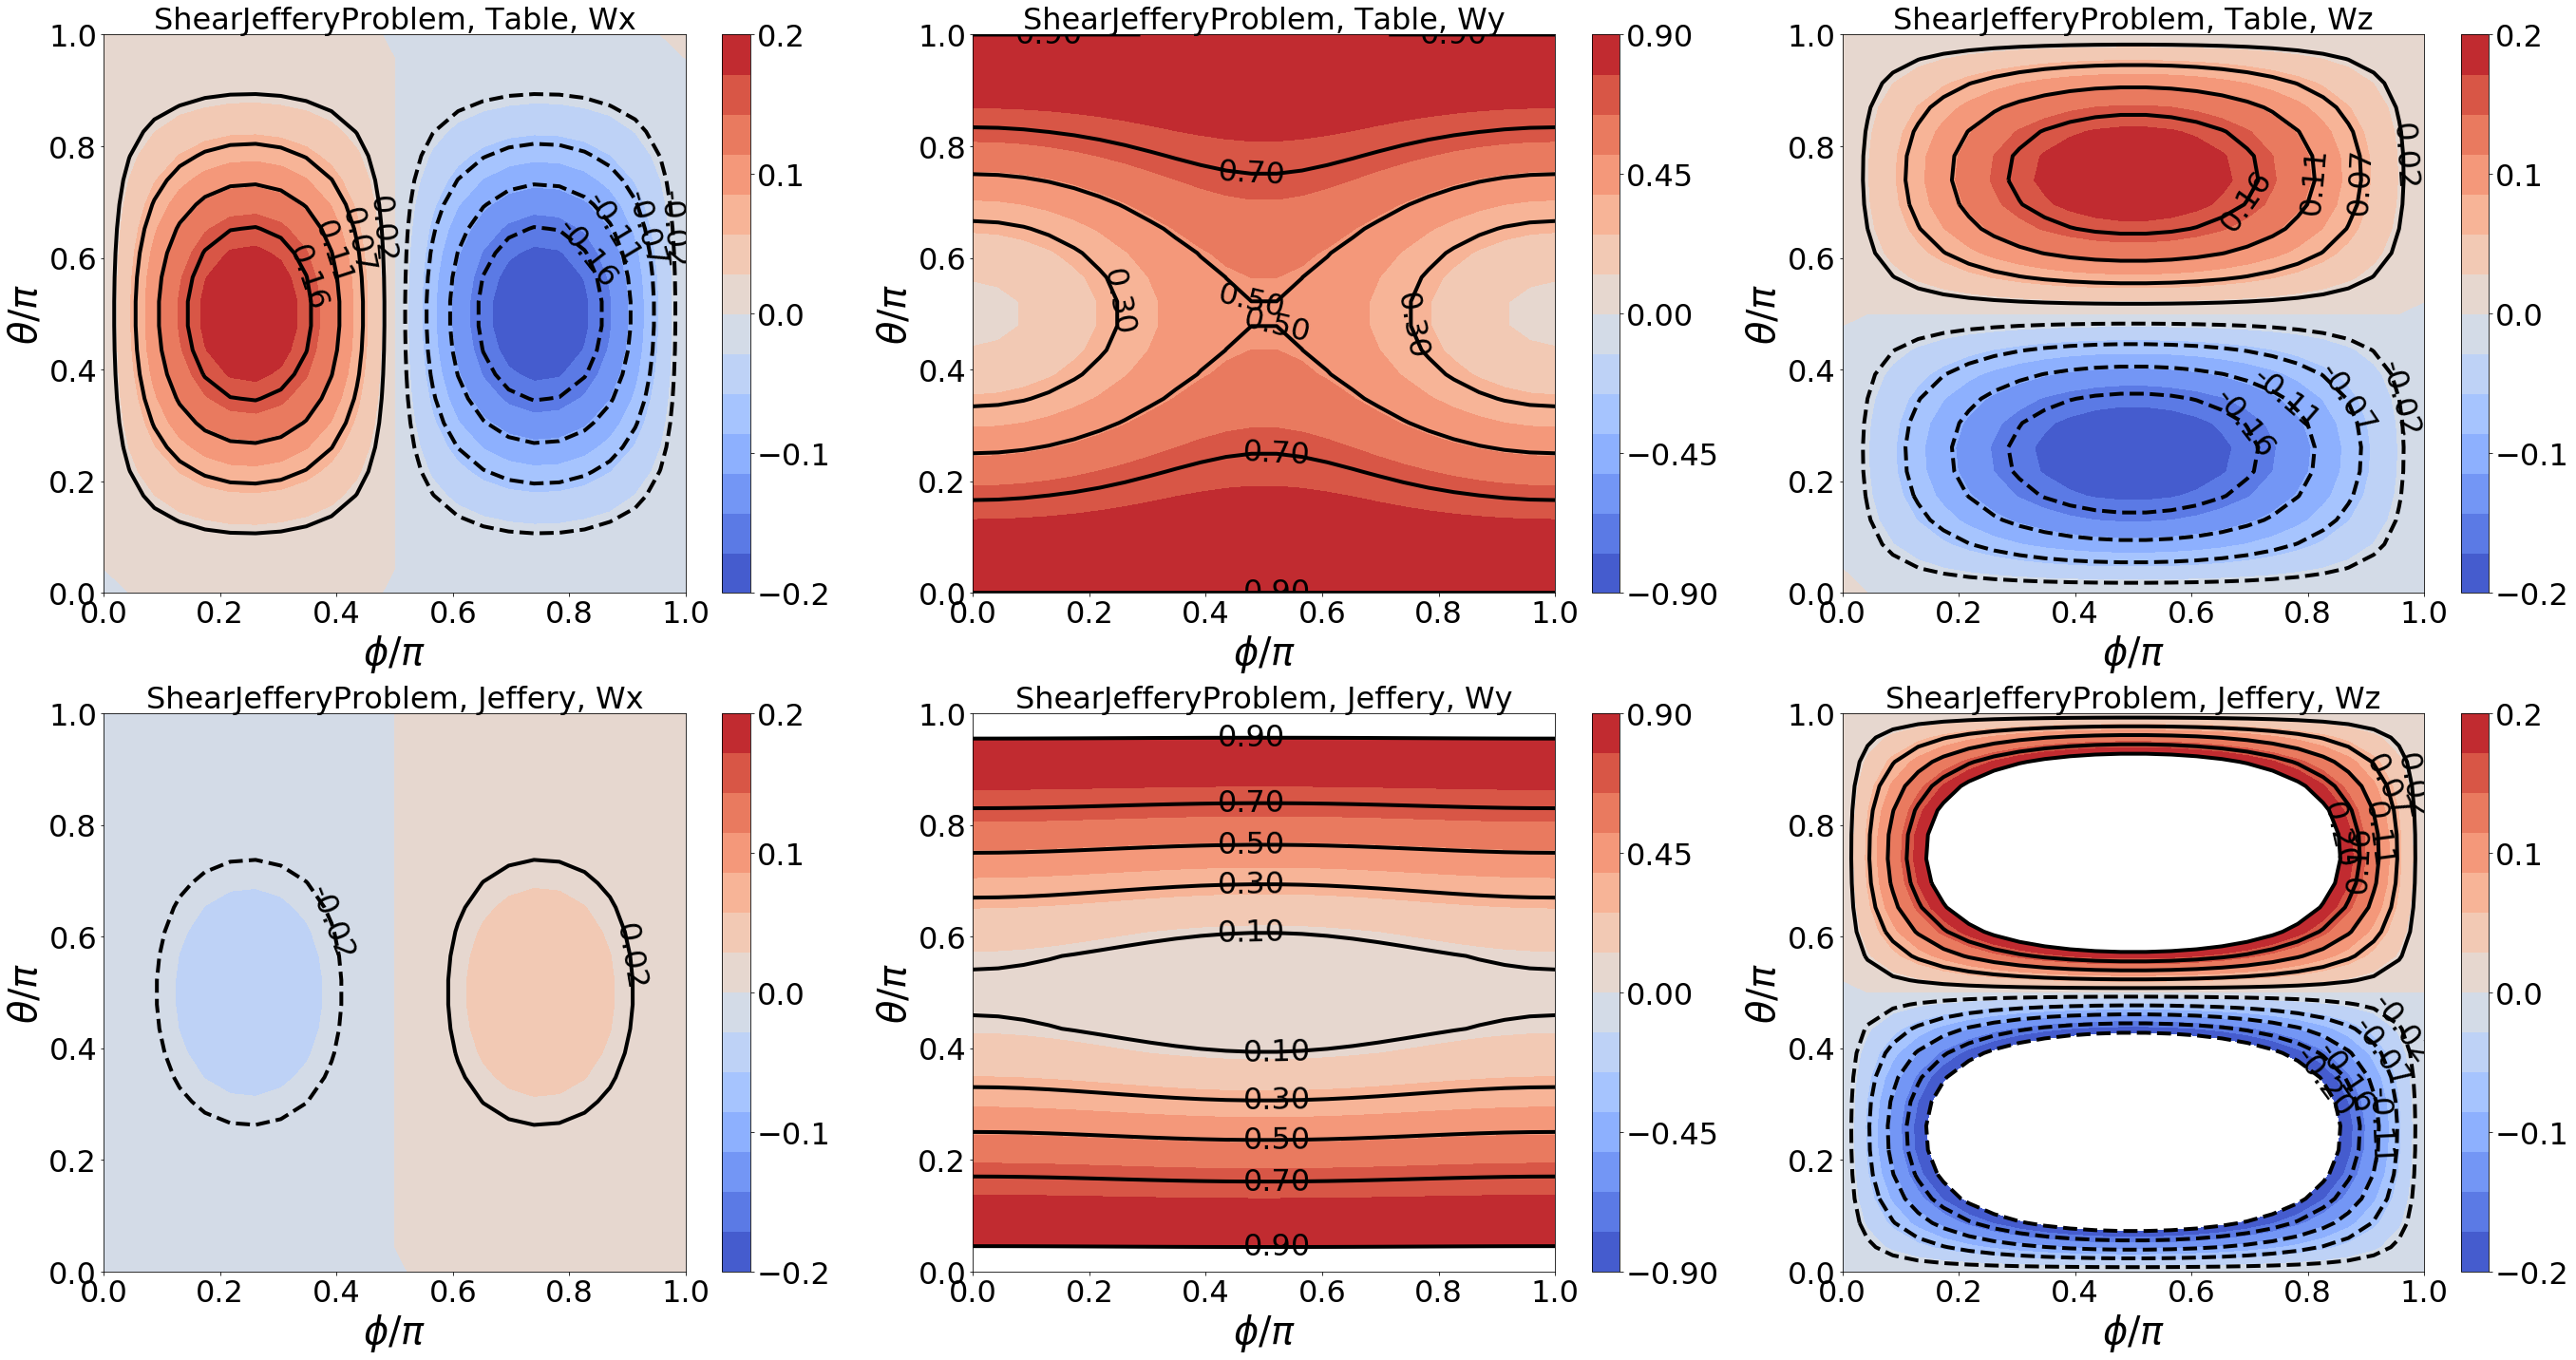

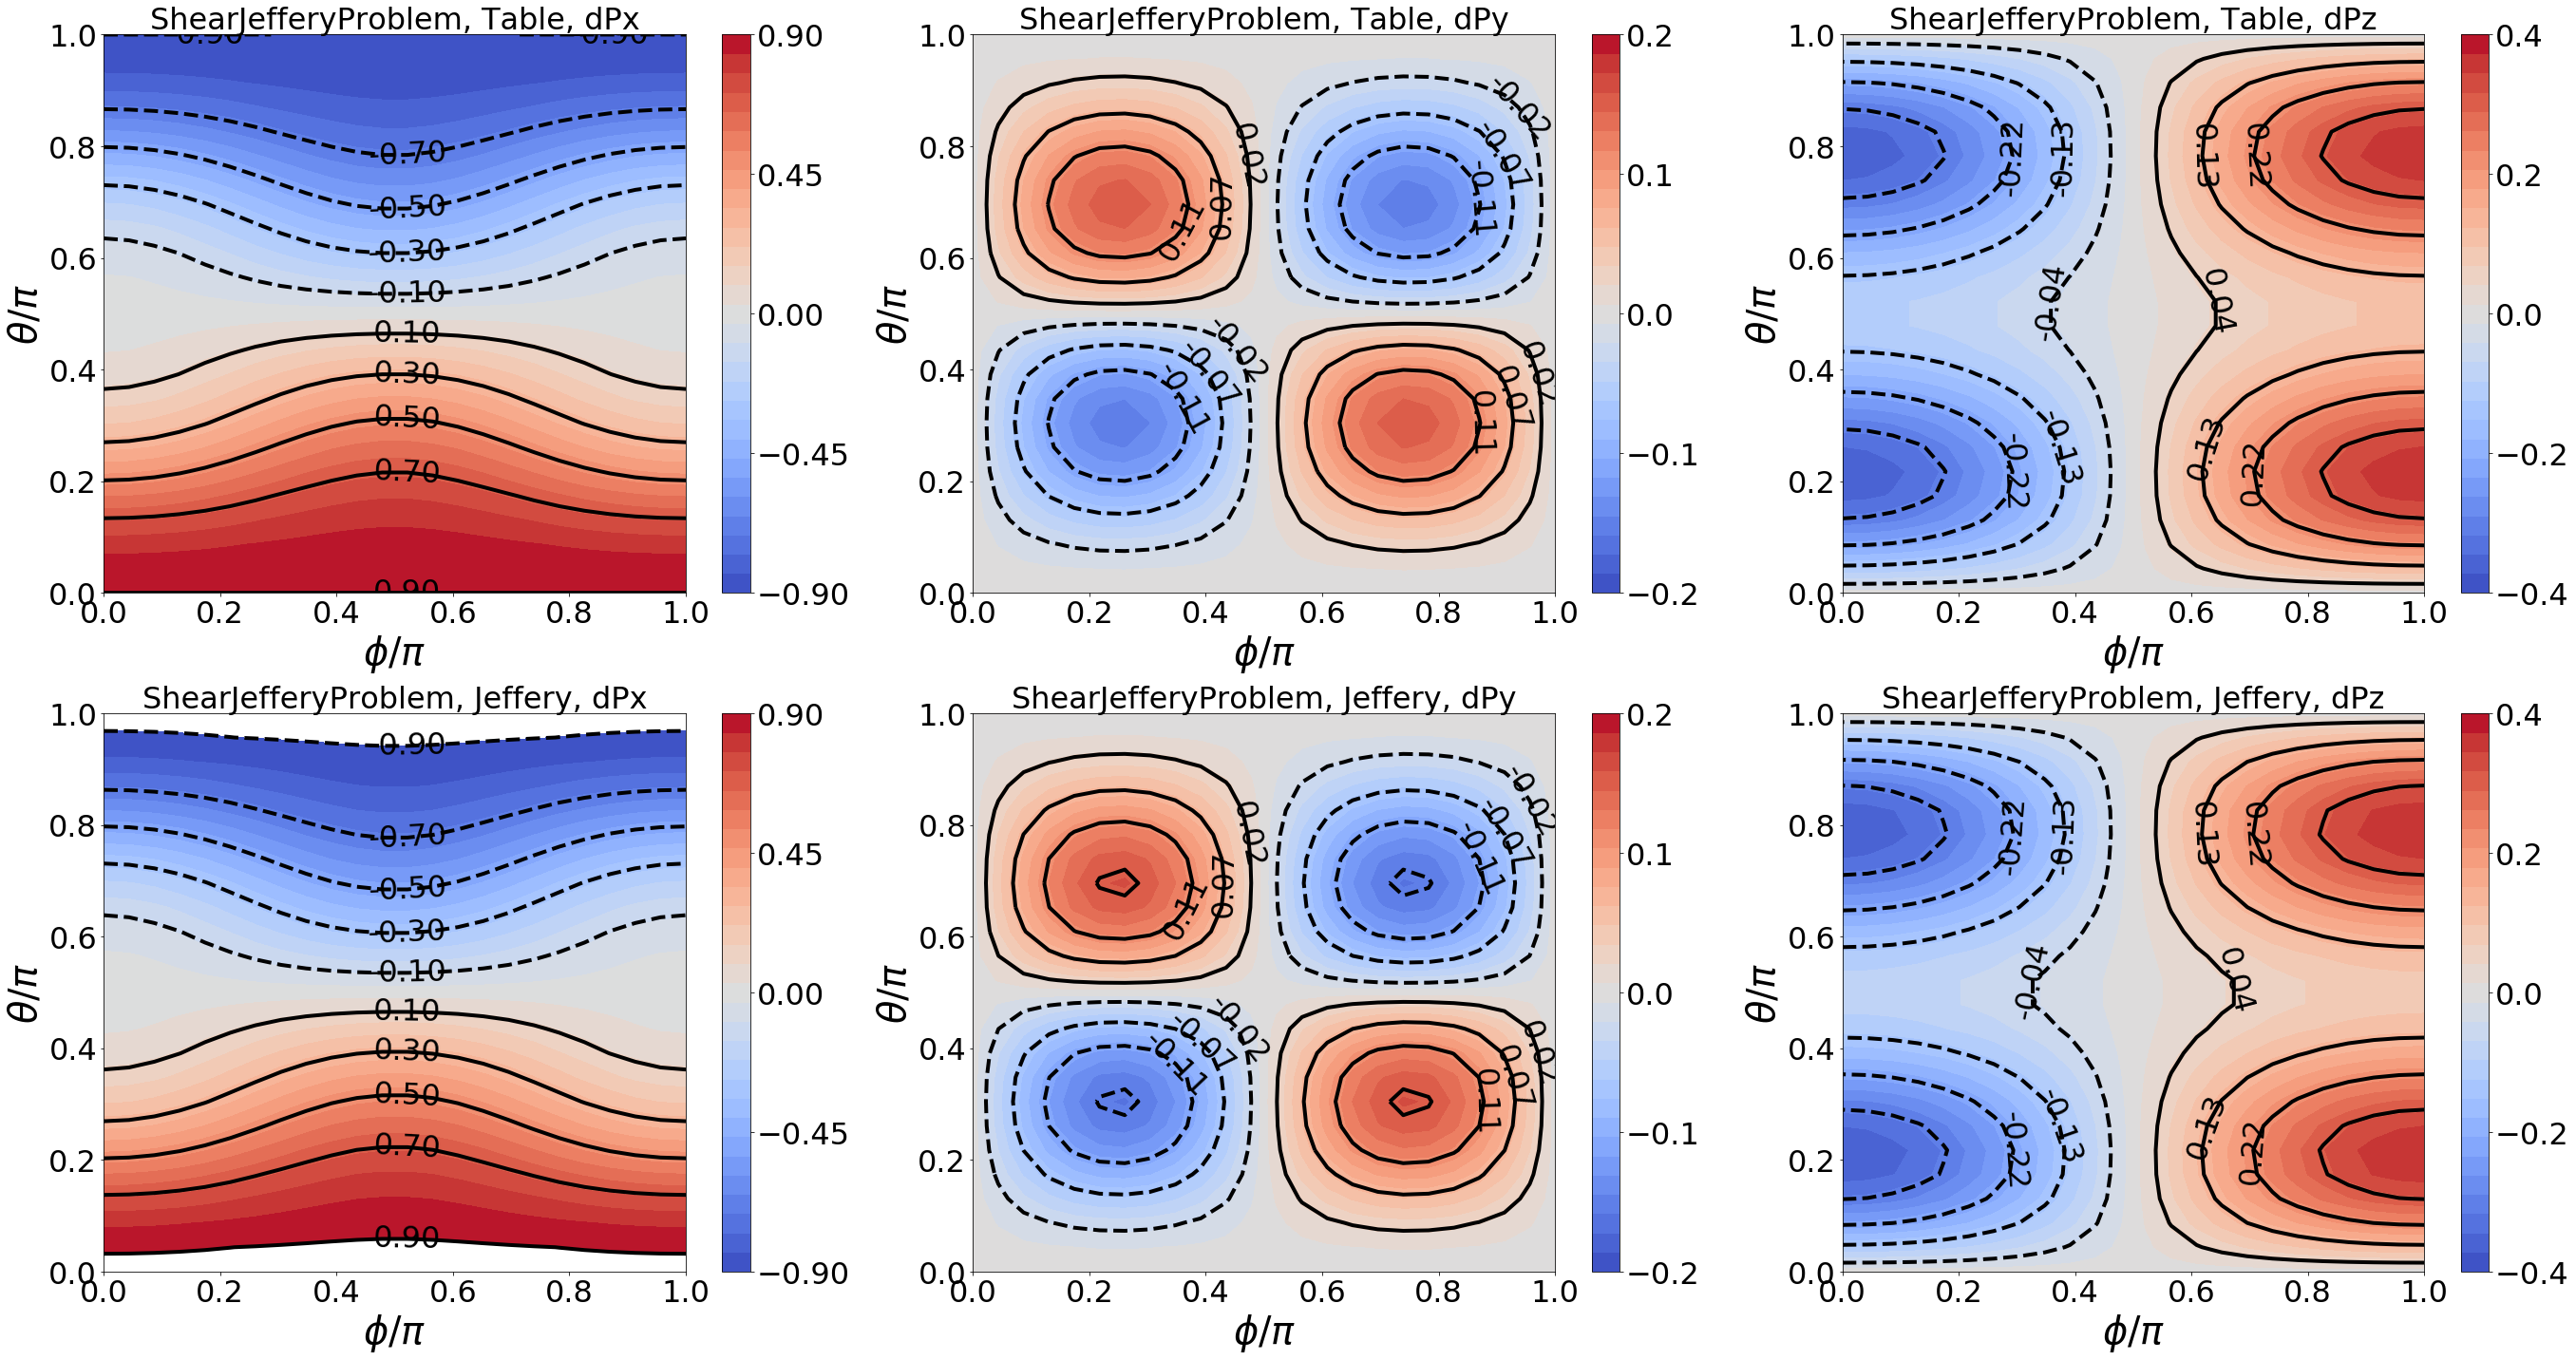

In [8]:
# compare dP between Jeffery and Table. 
importlib.reload(jm)
intp_n_theta, intp_n_phi = 24, 24
txx, tyy = np.meshgrid(np.linspace(0, np.pi, intp_n_theta), np.linspace(0, np.pi, intp_n_phi))

# Table version, load date and interpolate. 
ellipse_kwargs = {'name':         'ellipse',
                  'center':       tcenter,
                  'norm':         tnorm / np.linalg.norm(tnorm),
                  'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                  'speed':        ellipse_speed,
                  'lbd':          (talpha ** 2 - 1) / (talpha ** 2 + 1), 
                  'table_name':   'ellipse_alpha3', }
fileHandle = 'ShearTableProblem'
ellipse_obj = jm.TableObj(**ellipse_kwargs)
ellipse_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearTableProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(ellipse_obj)
Table_W = []
Table_dP = []
for theta, phi in zip(txx.flatten(), tyy.flatten()):
    P = np.array((np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)))
    dX, dP, dP2, omega = ellipse_obj.get_velocity_at(np.zeros(3), P, np.ones(3), 0, 0)
    Table_W.append(omega)
    Table_dP.append(dP)
Table_W = np.vstack(Table_W)
Table_dP = np.vstack(Table_dP)

# Jeffery version
ellipse_kwargs = {'name':         'ellipse',
                  'center':       tcenter,
                  'norm':         tnorm / np.linalg.norm(tnorm),
                  'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                  'speed':        ellipse_speed,
                  'rot_speed':    0,
                  'lbd':          (talpha ** 2 - 1) / (talpha ** 2 + 1)}
fileHandle = 'ShearJefferyProblem'
ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
ellipse_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearJefferyProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(ellipse_obj)
Jeffery_W = []
Jeffery_dP = []
for theta, phi in zip(txx.flatten(), tyy.flatten()):
    P = np.array((np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)))
    dX, dP, dP2, omega = ellipse_obj.get_velocity_at(np.zeros(3), P, np.ones(3), 0, 0)
    Jeffery_W.append(omega)
    Jeffery_dP.append(dP)
Jeffery_W = np.vstack(Jeffery_W)
Jeffery_dP = np.vstack(Jeffery_dP)


fig = plt.figure(figsize=(38, 20))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(2, 3, 1)
ax1 = fig.add_subplot(2, 3, 2)
ax2 = fig.add_subplot(2, 3, 3)
ax3 = fig.add_subplot(2, 3, 4)
ax4 = fig.add_subplot(2, 3, 5)
ax5 = fig.add_subplot(2, 3, 6)
for axi, ui, zlabeli, (vmin, vmax) in zip((ax0, ax1, ax2, ax3, ax4, ax5), 
                                           (Table_W[:, 0], Table_W[:, 1], Table_W[:, 2],
                                            Jeffery_W[:, 0], Jeffery_W[:, 1], Jeffery_W[:, 2]), 
                                            ('Table, Wx', 'Table, Wy', 'Table, Wz', 
                                             'Jeffery, Wx', 'Jeffery, Wy', 'Jeffery, Wz'),
                                            ((-0.2, 0.2), (-0.9, 0.9), (-0.2, 0.2), 
                                             (-0.2, 0.2), (-0.9, 0.9), (-0.2, 0.2))):
    plt.sca(axi)
    ticks = np.linspace(vmin, vmax, 15)
    im = axi.contourf(tyy / np.pi, txx / np.pi, ui.reshape((intp_n_theta, intp_n_phi)), 
                      ticks, cmap=cm.coolwarm)
    ticks = np.linspace(vmin, vmax, 5)
    fig.colorbar(im, ticks=ticks, ax=axi).ax.tick_params(labelsize=fontsize*0.8)
    ticks = np.linspace(vmin, vmax, 10)
    im = axi.contour(tyy / np.pi, txx / np.pi, ui.reshape((intp_n_theta, intp_n_phi)), 
                     ticks, linewidths=fontsize*0.1, colors='k')
    plt.clabel(im, fmt='%4.2f', colors='k', fontsize=fontsize*0.8, inline=0, rightside_up=1)
    axi.set_xlabel('$\\phi / \pi$', size=fontsize)
    axi.set_ylabel('$\\theta / \pi$', size=fontsize)
    axi.set_title('%s, %s' % (fileHandle, zlabeli), size=fontsize*0.8)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
plt.tight_layout()

fig = plt.figure(figsize=(38, 20))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(2, 3, 1)
ax1 = fig.add_subplot(2, 3, 2)
ax2 = fig.add_subplot(2, 3, 3)
ax3 = fig.add_subplot(2, 3, 4)
ax4 = fig.add_subplot(2, 3, 5)
ax5 = fig.add_subplot(2, 3, 6)
for axi, ui, zlabeli, (vmin, vmax) in zip((ax0, ax1, ax2, ax3, ax4, ax5), 
                                           (Table_dP[:, 0], Table_dP[:, 1], Table_dP[:, 2],
                                            Jeffery_dP[:, 0], Jeffery_dP[:, 1], Jeffery_dP[:, 2]), 
                                            ('Table, dPx', 'Table, dPy', 'Table, dPz', 
                                             'Jeffery, dPx', 'Jeffery, dPy', 'Jeffery, dPz'),
                                            ((-0.9, 0.9), (-0.2, 0.2), (-0.4, 0.4), 
                                             (-0.9, 0.9), (-0.2, 0.2), (-0.4, 0.4),)):
    plt.sca(axi)
    ticks = np.linspace(vmin, vmax, 30)
    im = axi.contourf(tyy / np.pi, txx / np.pi, ui.reshape((intp_n_theta, intp_n_phi)), 
                      ticks, cmap=cm.coolwarm)
    ticks = np.linspace(vmin, vmax, 5)
    fig.colorbar(im, ticks=ticks, ax=axi).ax.tick_params(labelsize=fontsize*0.8)
    ticks = np.linspace(vmin, vmax, 10)
    im = axi.contour(tyy / np.pi, txx / np.pi, ui.reshape((intp_n_theta, intp_n_phi)), 
                     ticks, linewidths=fontsize*0.1, colors='k')
    plt.clabel(im, fmt='%4.2f', colors='k', fontsize=fontsize*0.8, inline=0, rightside_up=1)
    axi.set_xlabel('$\\phi / \pi$', size=fontsize)
    axi.set_ylabel('$\\theta / \pi$', size=fontsize)
    axi.set_title('%s, %s' % (fileHandle, zlabeli), size=fontsize*0.8)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
plt.tight_layout()


In [9]:
# Ellipes Table result at given P

importlib.reload(jm)
eval_dt = 0.1
max_iter = 300
update_order = 3
ellipse_speed = 0
planeShearRate = np.array((1, 0, 0))
talpha = 1 / 0.3
tnorm = np.array((1, 0, 0))
lateral_norm = np.array((0, 1, 0))
tcenter = np.array((0, 0, 0))

# Table result
ellipse_kwargs = {'name':         'ellipse',
                  'center':       tcenter,
                  'norm':         tnorm / np.linalg.norm(tnorm),
                  'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                  'speed':        ellipse_speed,
                  'lbd':          (talpha ** 2 - 1) / (talpha ** 2 + 1), 
                  'table_name':   'ellipse_alpha3', }
fileHandle = 'ShearTableProblem'
ellipse_obj = jm.TableObj(**ellipse_kwargs)
ellipse_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearTableProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(ellipse_obj)

# dX, dP, dP2, omega = ellipse_obj.get_velocity_at(tcenter, tnorm, lateral_norm, 0, 0)
# print(dX)
tU = ellipse_obj.intp_U_fun(np.pi / 2, 0, 0)
print()
print(tU)



[  6.36275e-05   3.56492e-11   5.61622e-11   5.15721e-09   9.99640e-02   1.78049e-07]


ini norm= [-0.18895  0.98161  0.02724] helix_speed= 0
ShearTableProblem: run 1000 loops using 1.326271


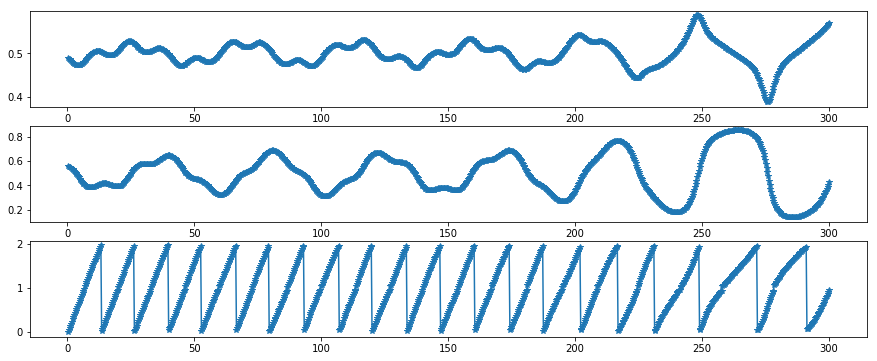

In [15]:
# Helix case. Table. 

importlib.reload(jm)
eval_dt = 0.3
max_iter = 1000
update_order = 1
helix_speed = 0
planeShearRate = np.array((1, 0, 0))
tnorm = np.array((-0.18895, 0.98161, 0.02724))
tnorm = tnorm / np.linalg.norm(tnorm)
lateral_norm = np.random.sample(3)
lateral_norm = lateral_norm / np.linalg.norm(lateral_norm)
lateral_norm = lateral_norm - tnorm * np.dot(tnorm, lateral_norm)
lateral_norm = lateral_norm / np.linalg.norm(lateral_norm)

tcenter = np.array((0, 0, 0))
print('ini norm=', tnorm, 'helix_speed=', helix_speed)

# Table result
helix_kwargs = {'name':         'helix',
                'center':       tcenter,
                'norm':         tnorm / np.linalg.norm(tnorm),
                'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                'speed':        helix_speed,
                'lbd':          np.nan, 
                'table_name':   'hlxB01_tau1a', }
fileHandle = 'ShearTableProblem'
helix_obj = jm.TableObj(**helix_kwargs)
helix_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearTableProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(helix_obj)
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
Table_X = np.vstack(helix_obj.center_hist)
Table_U = np.vstack(helix_obj.U_hist)
Table_P = np.vstack(helix_obj.norm_hist)
Table_P2 = np.vstack(helix_obj.lateral_norm_hist)
Table_t = np.arange(max_iter) * eval_dt + eval_dt
Table_theta = np.arccos(Table_P[:, 2] / np.linalg.norm(Table_P, axis=1))
t_phi = np.arctan2(Table_P[:, 1], Table_P[:, 0])
Table_phi = np.hstack([t1 + 2 * np.pi if t1 < 0 else t1 for t1 in t_phi])
Table_psi = []
t_norm0 = Table_P[0]
t_lateral_norm0 = Table_P2[0]
for t_lateral_norm, t_theta, t_phi in zip(Table_P2, Table_theta, Table_phi):
    t_lateral_norm = vector_rotation(t_lateral_norm, norm=np.array((0, 0, 1)), theta=-t_phi)
    t_lateral_norm = vector_rotation(t_lateral_norm, norm=np.array((0, 1, 0)), theta=Table_theta[0]-t_theta)
    t_lateral_norm = vector_rotation(t_lateral_norm, norm=np.array((0, 0, 1)), theta=Table_phi[0])
    sign = np.sign(np.dot(t_norm0, np.cross(t_lateral_norm0, t_lateral_norm)))
    t_psi = sign * np.arccos(np.clip(np.dot(t_lateral_norm0, t_lateral_norm) 
                                     / np.linalg.norm(t_lateral_norm) / np.linalg.norm(t_lateral_norm0),
                                     -1, 1))
    t_psi = t_psi + 2 * np.pi if t_psi < 0 else t_psi  # (-pi,pi) -> (0, 2pi)
    Table_psi.append(t_psi)
Table_psi = np.hstack(Table_psi)
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))

fig = plt.figure(figsize=(15, 6))
fig.patch.set_facecolor('white')
ax0, ax1, ax2 = fig.subplots(nrows=3, ncols=1)
ax0.plot(Table_t, Table_theta / np.pi, '-*')
ax1.plot(Table_t, Table_phi / np.pi, '-*')
ax2.plot(Table_t, Table_psi / np.pi, '-*')


ini norm= [ 1.  0.  0.] helix_speed= 0
ShearTableProblem: run 10 loops using 0.012973


/home/zhangji/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


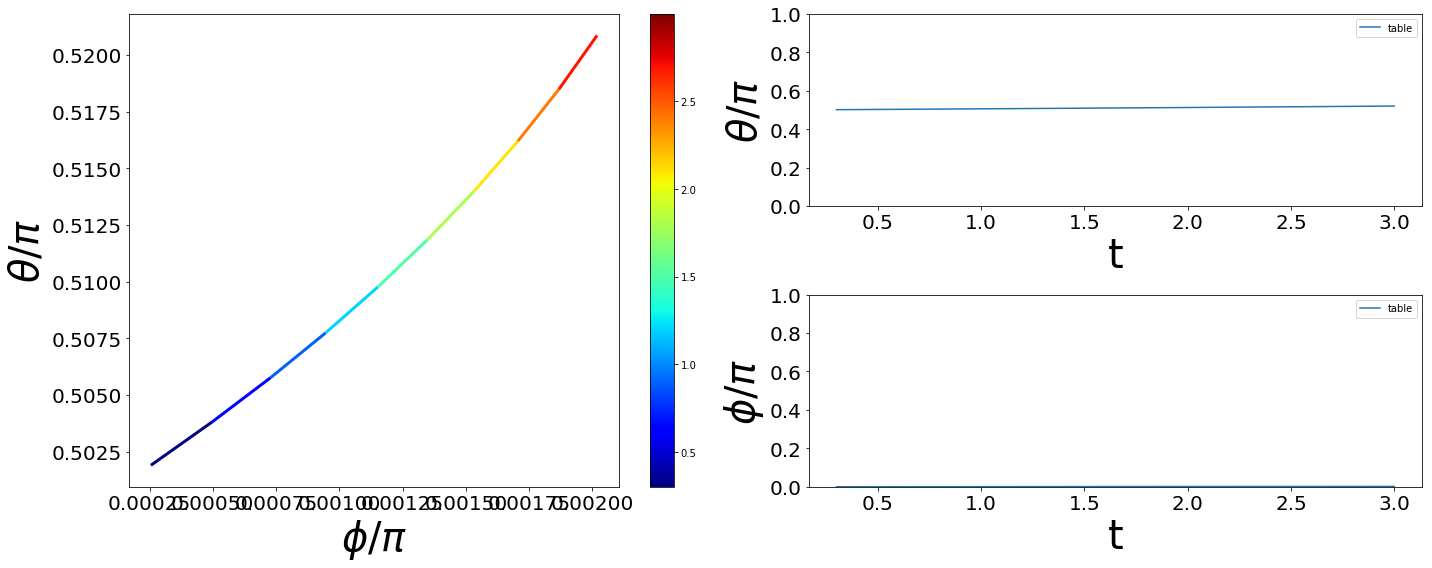

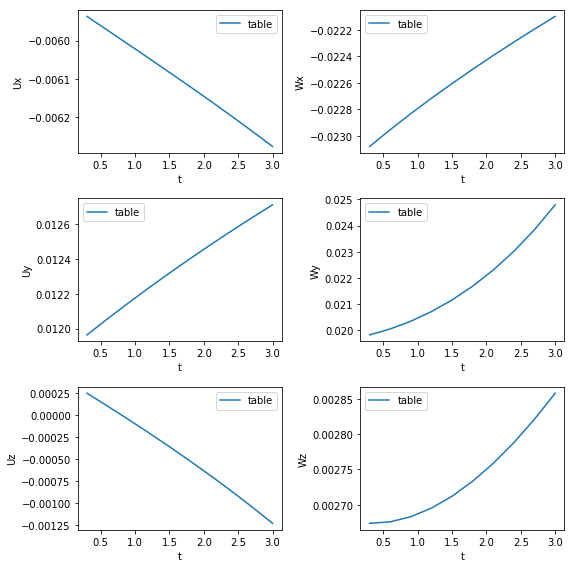

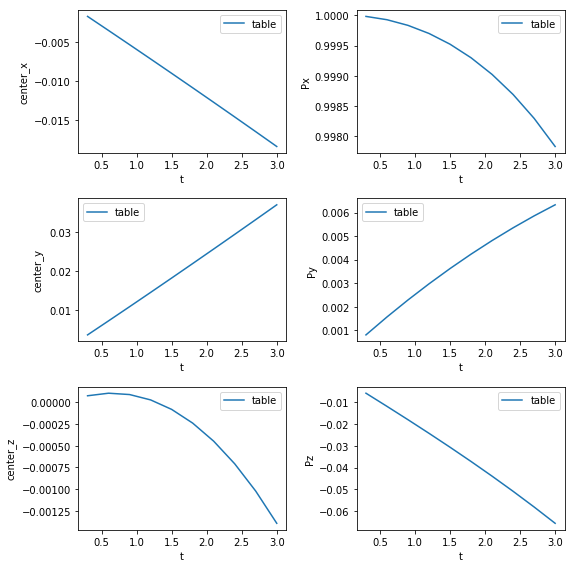

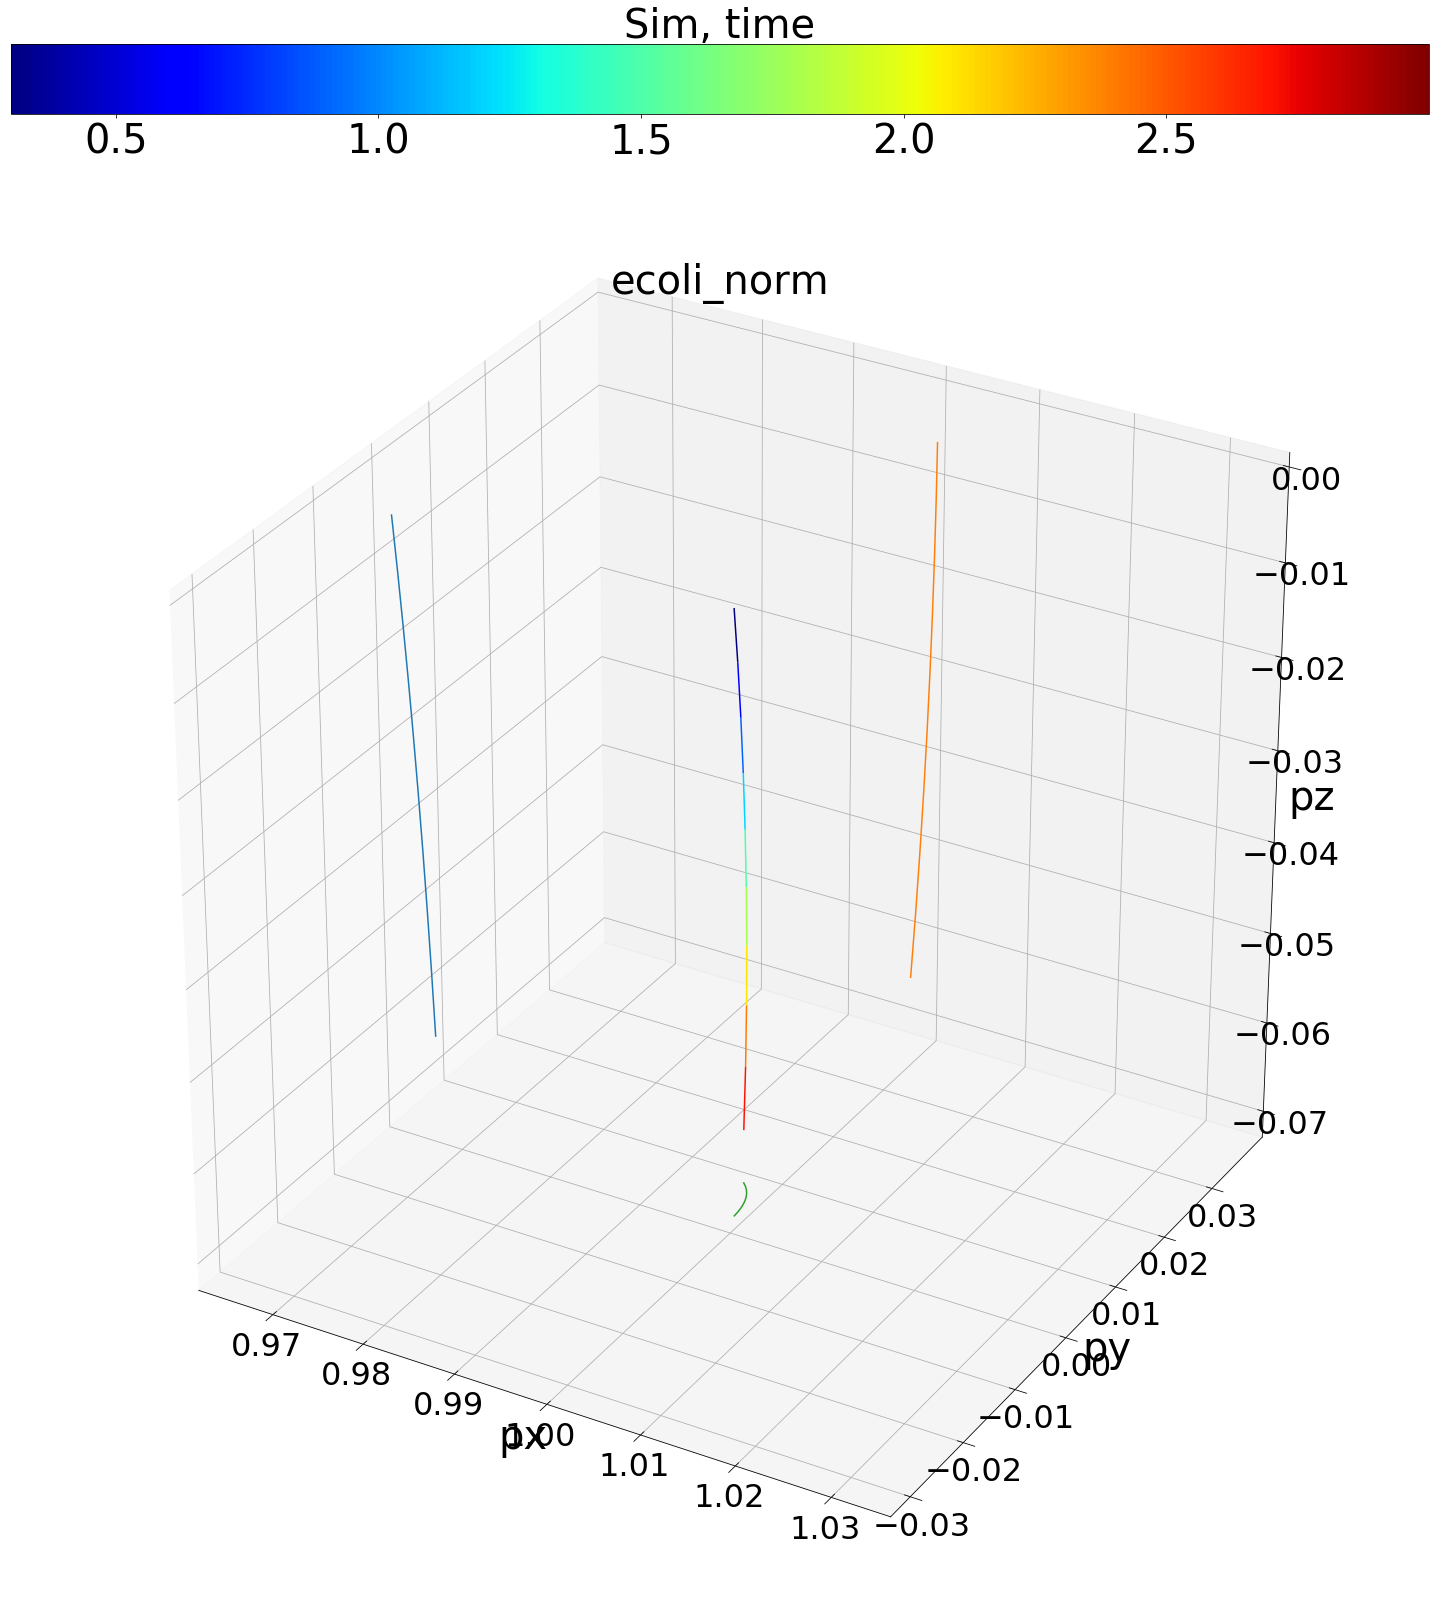

In [19]:
# Helix case. Table. 

importlib.reload(jm)
eval_dt = 0.3
max_iter = 10
update_order = 1
helix_speed = 0
planeShearRate = np.array((0, 0, 0))
tnorm = np.array((1, 0, 0))
tnorm = tnorm / np.linalg.norm(tnorm)
lateral_norm = np.random.sample(3)
lateral_norm = lateral_norm / np.linalg.norm(lateral_norm)
lateral_norm = lateral_norm - tnorm * np.dot(tnorm, lateral_norm)
lateral_norm = lateral_norm / np.linalg.norm(lateral_norm)

tcenter = np.array((0, 0, 0))
print('ini norm=', tnorm, 'helix_speed=', helix_speed)

# Table result
helix_kwargs = {'name':         'helix',
                'center':       tcenter,
                'norm':         tnorm / np.linalg.norm(tnorm),
                'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                'speed':        helix_speed,
                'lbd':          np.nan, 
                'table_name':   'hlxB01_tau1a', }
fileHandle = 'ShearTableProblem'
helix_obj = jm.TableObj(**helix_kwargs)
helix_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearTableProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(helix_obj)
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
Table_X = np.vstack(helix_obj.center_hist)
Table_U = np.vstack(helix_obj.U_hist)
Table_P = np.vstack(helix_obj.norm_hist)
Table_t = np.arange(max_iter) * eval_dt + eval_dt
Table_theta = np.arccos(Table_P[:, 2] / np.linalg.norm(Table_P, axis=1))
t_phi = np.arctan2(Table_P[:, 1], Table_P[:, 0])
Table_phi = np.hstack([t1 + 2 * np.pi if t1 < 0 else t1 for t1 in t_phi])
# Table_phi = Table_P[:, 1] / Table_P[:, 0]
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))

fig = plt.figure(figsize=(20, 8))
fig.patch.set_facecolor('white')
ax0 = plt.subplot2grid((2, 2), (0, 0), rowspan=2)
ax1 = plt.subplot2grid((2, 2), (0, 1), )
ax2 = plt.subplot2grid((2, 2), (1, 1), )
norm=plt.Normalize(Table_t.min(), Table_t.max())
cmap=plt.get_cmap('jet')
ax0.plot(Table_phi / np.pi, Table_theta / np.pi, ' ')
# ax0.plot(Table_phi / np.pi, Table_theta / np.pi, '*', ms=fontsize*0.5)
lc = spf.colorline(Table_phi / np.pi, Table_theta / np.pi, Table_t, 
                   ax=ax0, cmap=cmap, norm=norm, linewidth=3)
clb = fig.colorbar(lc, ax=ax0, orientation="vertical")
ax0.set_xlabel('$\\phi / \pi$', size=fontsize)
ax0.set_ylabel('$\\theta / \pi$', size=fontsize)
plt.sca(ax0)
plt.xticks(fontsize=fontsize*0.5)
plt.yticks(fontsize=fontsize*0.5)
# ax1.plot(Jeffery_t, Jeffery_theta / np.pi, label='Jeffery')
# ax2.plot(Jeffery_t, Jeffery_phi / np.pi, label='Jeffery')
ax1.plot(Table_t, Table_theta / np.pi, label='table')
ax2.plot(Table_t, Table_phi / np.pi, label='table')
for axi, axyi in zip((ax1, ax2, ), ('$\\theta / \pi$', '$\\phi / \pi$')):
    plt.sca(axi)
    axi.set_xlabel('t', size=fontsize)
    axi.set_ylabel('%s' % axyi, size=fontsize)
    axi.set_ylim((0, 1))
    axi.legend()
    plt.xticks(fontsize=fontsize*0.5)
    plt.yticks(fontsize=fontsize*0.5)
plt.tight_layout()

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 3)
ax2 = fig.add_subplot(3, 2, 5)
ax3 = fig.add_subplot(3, 2, 2)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 6)
# ax0.plot(Jeffery_t, Jeffery_U[:, 0], label='Jeffery')
# ax1.plot(Jeffery_t, Jeffery_U[:, 1], label='Jeffery')
# ax2.plot(Jeffery_t, Jeffery_U[:, 2], label='Jeffery')
# ax3.plot(Jeffery_t, Jeffery_U[:, 3], label='Jeffery')
# ax4.plot(Jeffery_t, Jeffery_U[:, 4], label='Jeffery')
# ax5.plot(Jeffery_t, Jeffery_U[:, 5], label='Jeffery')
ax0.plot(Table_t, Table_U[:, 0], label='table')
ax1.plot(Table_t, Table_U[:, 1], label='table')
ax2.plot(Table_t, Table_U[:, 2], label='table')
ax3.plot(Table_t, Table_U[:, 3], label='table')
ax4.plot(Table_t, Table_U[:, 4], label='table')
ax5.plot(Table_t, Table_U[:, 5], label='table')
for axi, axyi in zip((ax0, ax1, ax2, ax3, ax4, ax5, ), ('Ux', 'Uy', 'Uz','Wx', 'Wy', 'Wz')):
    axi.set_xlabel('t')
    axi.set_ylabel('%s' % axyi)
    axi.legend()
plt.tight_layout()

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 3)
ax2 = fig.add_subplot(3, 2, 5)
ax3 = fig.add_subplot(3, 2, 2)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 6)
Jeffery_t = np.arange(max_iter) * eval_dt + eval_dt
# ax0.plot(Jeffery_t, Jeffery_X[:, 0], label='Jeffery')
# ax1.plot(Jeffery_t, Jeffery_X[:, 1], label='Jeffery')
# ax2.plot(Jeffery_t, Jeffery_X[:, 2], label='Jeffery')
# ax3.plot(Jeffery_t, Jeffery_P[:, 0], label='Jeffery')
# ax4.plot(Jeffery_t, Jeffery_P[:, 1], label='Jeffery')
# ax5.plot(Jeffery_t, Jeffery_P[:, 2], label='Jeffery')
ax0.plot(Table_t, Table_X[:, 0], label='table')
ax1.plot(Table_t, Table_X[:, 1], label='table')
ax2.plot(Table_t, Table_X[:, 2], label='table')
ax3.plot(Table_t, Table_P[:, 0], label='table')
ax4.plot(Table_t, Table_P[:, 1], label='table')
ax5.plot(Table_t, Table_P[:, 2], label='table')
for axi, axyi in zip((ax0, ax1, ax2, ax3, ax4, ax5), ('center_x', 'center_y', 'center_z', 'Px', 'Py', 'Pz')):
    axi.set_xlabel('t')
    axi.set_ylabel('%s' % axyi)
    axi.legend()
plt.tight_layout()

fig = plt.figure(figsize=(20, 20))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1, projection='3d')
ax0.set_title('ecoli_norm', size=fontsize)
cax0 = inset_axes(ax0, width="100%", height="5%", bbox_to_anchor=(0, 0.1, 1, 1),
               loc=1, bbox_transform=ax0.transAxes, borderpad=0,)
norm=plt.Normalize(Table_t.min(), Table_t.max())
cmap=plt.get_cmap('jet')
# Create the 3D-line collection object
points = Table_P.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = Line3DCollection(segments, cmap=cmap, norm=norm)
lc.set_array(Table_t) 
ax0.add_collection3d(lc, zs=points[:, :, 2].flatten(), zdir='z')
ax0.set_xlim(points[:, :, 0].min(), points[:, :, 0].max())
ax0.set_ylim(points[:, :, 1].min(), points[:, :, 1].max())
ax0.set_zlim(points[:, :, 2].min(), points[:, :, 2].max())
spf.set_axes_equal(ax0)
ax0.plot(np.ones_like(points[:, :, 0].flatten())*ax0.get_xlim()[0], points[:, :, 1].flatten(), points[:, :, 2].flatten())
ax0.plot(points[:, :, 0].flatten(), np.ones_like(points[:, :, 1].flatten())*ax0.get_ylim()[1], points[:, :, 2].flatten())
ax0.plot(points[:, :, 0].flatten(), points[:, :, 1].flatten(), np.ones_like(points[:, :, 2].flatten())*ax0.get_zlim()[0])
clb = fig.colorbar(lc, cax=cax0, orientation="horizontal")
clb.ax.tick_params(labelsize=fontsize)
clb.ax.set_title('Sim, time', size=fontsize)
plt.sca(ax0)
ax0.set_xlabel('px', size=fontsize)
ax0.set_ylabel('py', size=fontsize)
ax0.set_zlabel('pz', size=fontsize)
plt.xticks(fontsize=fontsize*0.8)
plt.yticks(fontsize=fontsize*0.8)
for t in ax0.zaxis.get_major_ticks(): t.label.set_fontsize(fontsize*0.8)
for spine in ax0.spines.values():
    spine.set_visible(False)
plt.tight_layout()


In [4]:
P10 = np.random.sample(3)
P10 = P10 / np.linalg.norm(P10)
theta0 = np.arccos(P10[2] / np.linalg.norm(P10))
phi0 = np.arctan2(P10[1], P10[0])
phi0 = phi0 + 2 * np.pi if phi0 < 0 else phi0  # (-pi,pi) -> (0, 2pi)
P11 = np.random.sample(3)
P11 = P11 / np.linalg.norm(P11)
theta1 = np.arccos(P11[2] / np.linalg.norm(P11))
phi1 = np.arctan2(P11[1], P11[0])
phi1 = phi1 + 2 * np.pi if phi1 < 0 else phi1  # (-pi,pi) -> (0, 2pi)
print(P10, theta0, phi0)
print(P11, theta1, phi1)
tP = vector_rotation(P11, norm=np.array((0, 0, 1)), theta=-phi1)
tP = vector_rotation(tP, norm=np.array((0, 1, 0)), theta=theta0-theta1)
tP = vector_rotation(tP, norm=np.array((0, 0, 1)), theta=phi0)
print(tP)
print()

P20 = np.random.sample(3)
P20 = P20 / np.linalg.norm(P20)
P20 = P20 - P10 * np.dot(P10, P20) / np.linalg.norm(P10) ** 2
P21 = vector_rotation(P20, norm=np.array((0, 0, 1)), theta=-phi0)
P21 = vector_rotation(P21, norm=np.array((0, 1, 0)), theta=-theta0)
t_psi0 = np.random.sample(1) * 2 * np.pi
P21 = vector_rotation(P21, norm=np.array((0, 0, 1)), theta=t_psi0)
P21 = vector_rotation(P21, norm=np.array((0, 1, 0)), theta=theta1)
P21 = vector_rotation(P21, norm=np.array((0, 0, 1)), theta=phi1)
print(P10, P20, np.dot(P10, P20))
print(P11, P21, np.dot(P11, P21))

tP = vector_rotation(P21, norm=np.array((0, 0, 1)), theta=-phi1)
tP = vector_rotation(tP, norm=np.array((0, 1, 0)), theta=theta0-theta1)
tP = vector_rotation(tP, norm=np.array((0, 0, 1)), theta=phi0)
sign = np.sign(np.dot(P10, np.cross(P20, tP)))
t_psi = sign * np.arccos(np.clip(np.dot(tP, P20) / np.linalg.norm(tP) / np.linalg.norm(P20), -1, 1))
t_psi = t_psi + 2 * np.pi if t_psi < 0 else t_psi  # (-pi,pi) -> (0, 2pi)
print(t_psi0, t_psi, t_psi0-t_psi)





[ 0.59783  0.52778  0.60337] 0.923076521556 0.723242280682
[ 0.42718  0.8804   0.20592] 1.36338944578 1.11905094259
[ 0.59783  0.52778  0.60337]

[ 0.59783  0.52778  0.60337] [ 0.12726  0.27059 -0.36278] 0.0
[ 0.42718  0.8804   0.20592] [-0.56003  0.07884  0.82471] 2.77555756156e-17
[ 2.31812] 2.31812359719 [ 0.]
